## Import stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from mysticetus import Models
from mysticetus import Objective
from mysticetus import aux
from mysticetus import model_driven_reco

## Real stuff

In [2]:
xres = 2048
yres = 2048
x                = np.linspace(0, xres, xres, endpoint=False)
y                = np.linspace(0, xres, yres, endpoint=False)
xx, yy           = np.meshgrid(x, y)

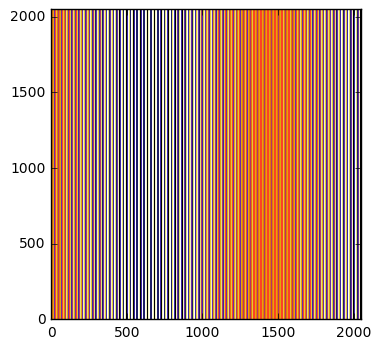

In [3]:
consts           = {'domain':{'xx':xx, 'yy':yy}}
params           = {'sigma': 0.11, 'pitch':0.23 , 'fsize':0.17}
interims         = {}

Models.DistModelGrating2D()(params, interims, consts)
plt.imshow(interims['dist'], **aux.iss)

In [4]:
print(np.sum(interims['dist']))

2627637.00636


/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


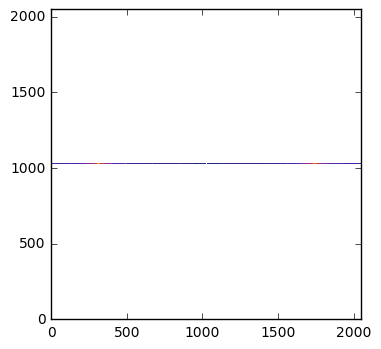

In [5]:
consts           = {'domain':{'xx':xx, 'yy':yy}}
params           = {'sigma': 0.11, 'pitch':0.23 , 'fsize':0.17}
interims         = {}

Models.DistModelGrating2D()(params, interims, consts)
aux.MeasModelFarField()        (params, interims, consts)

dat = np.log(np.abs(interims['far_field']))
plt.imshow(dat, **aux.iss)

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


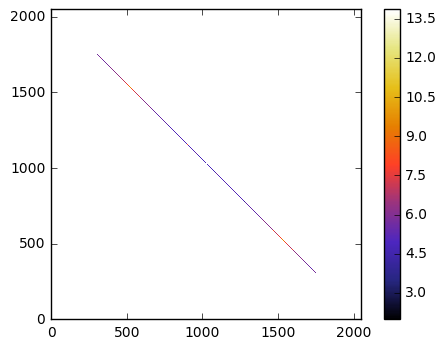

In [6]:
consts           = {'domain':{'xx':xx, 'yy':yy}}
params           = {'sigma': 0.11, 'pitch':0.23 , 'fsize':0.17, 'ff_angle':np.pi/4}
interims         = {}

Models.DistModelGrating2D()(params, interims, consts)
aux.MeasModelFarField()        (params, interims, consts)
aux.RotateFF()                 (params, interims, consts)

dat = np.log(np.abs(interims['far_field']))
plt.imshow(dat, **aux.iss)
plt.colorbar()
print(dat)

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


True


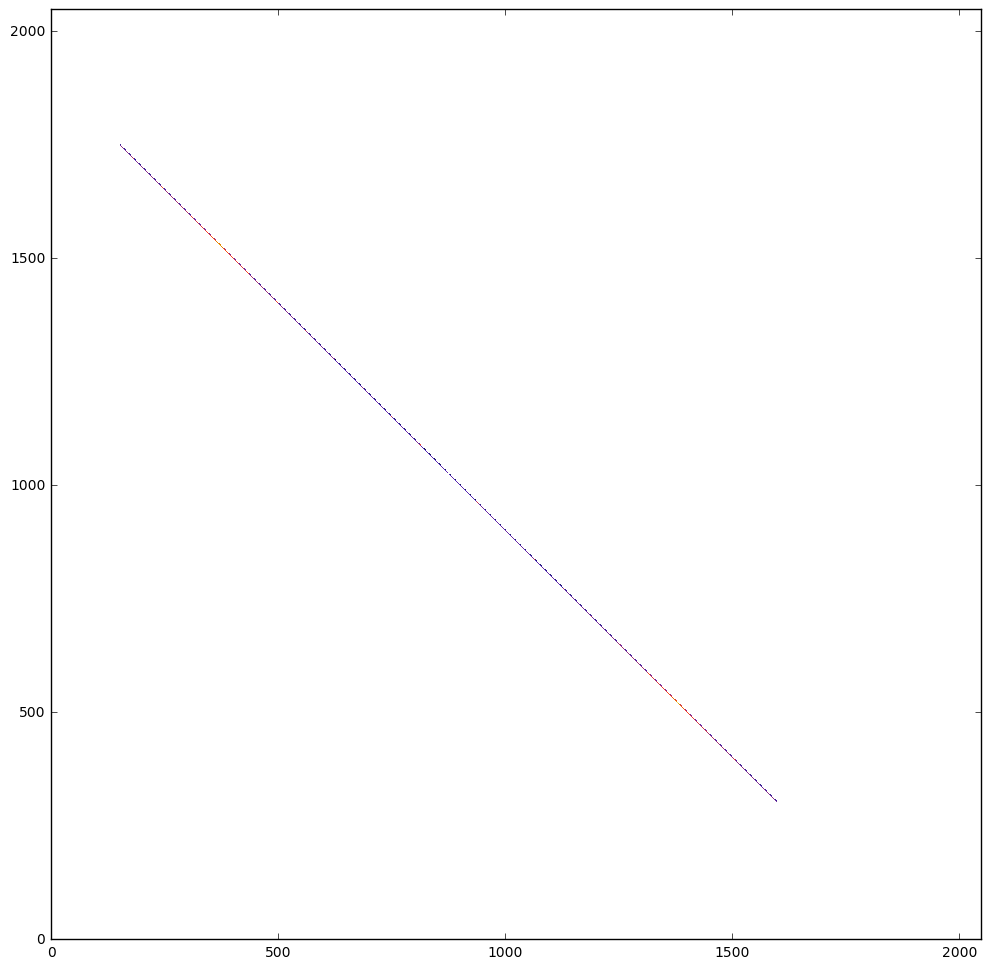

In [7]:
consts           = {'domain':{'xx':xx, 'yy':yy}}
params           = {'sigma': 0.11, 'pitch':0.23 , 'fsize':0.17, 'ff_angle':np.pi/4, 'disp':(0, -150)}
interims         = {}

Models.DistModelGrating2D()(params, interims, consts)
aux.MeasModelFarField()        (params, interims, consts)
aux.RotateFF()                 (params, interims, consts)
aux.DisplaceMeas()             (params, interims, consts)

dat = np.log(np.abs(interims['far_field']))
plt.figure(figsize=(20,12))
plt.imshow(dat, **aux.iss)

print(np.any(np.abs(interims['far_field'])!=0))

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


False


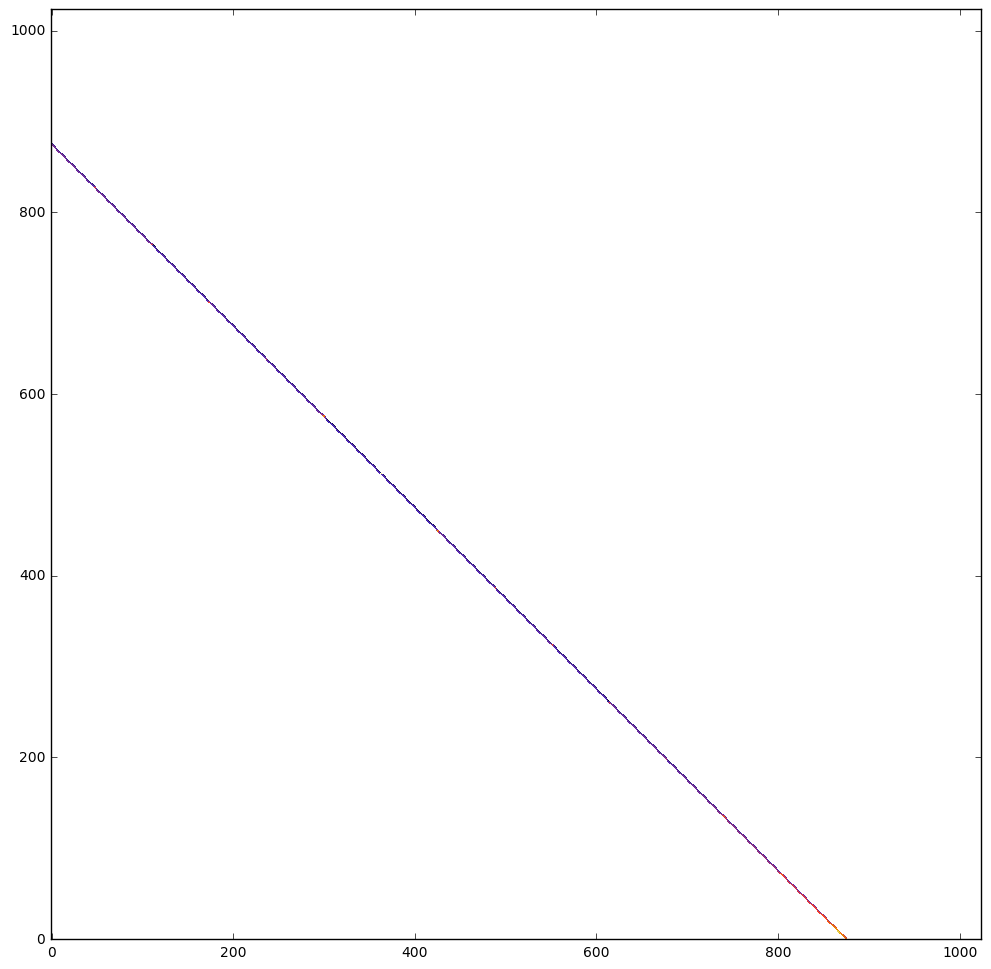

In [8]:
consts           = {'domain':{'xx':xx, 'yy':yy}, 'crop_slice':(slice(512, 2048-512), slice(512, 2048-512))}
params           = {'sigma': 0.11, 'pitch':0.23 , 'fsize':0.17, 'ff_angle':np.pi/4, 'disp':(0, -150)}
interims         = {}

Models.DistModelGrating2D()(params, interims, consts)
aux.MeasModelFarField()        (params, interims, consts)
aux.RotateFF()                 (params, interims, consts)
aux.DisplaceMeas()             (params, interims, consts)
aux.CropFarfield()             (params, interims, consts)

dat = np.log(np.abs(interims['far_field']))
plt.figure(figsize=(20,12))
plt.imshow(dat, **aux.iss)

print(np.any(np.isnan(interims['far_field'])))

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log


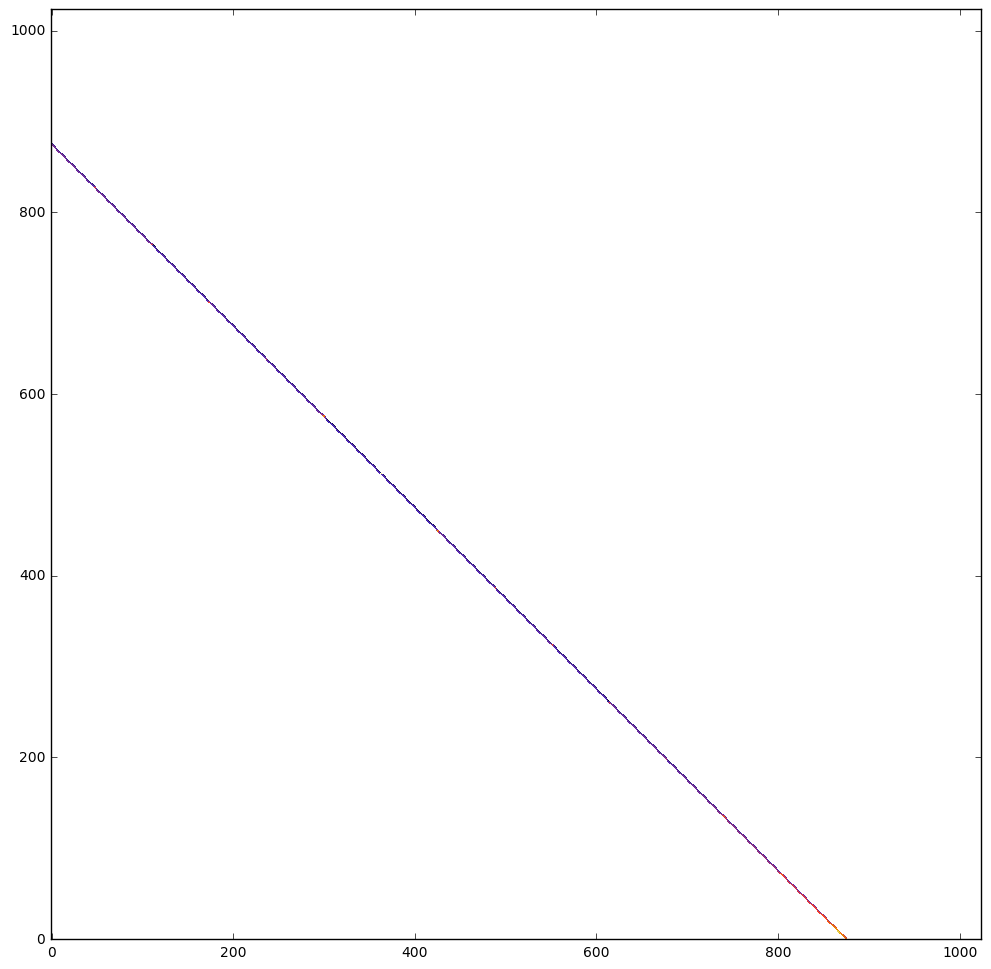

In [9]:
consts           = {\
    'domain':{'xx':xx, 'yy':yy},
    'crop_slice':(slice(512, 2048-512), slice(512, 2048-512)),
    'photon_statistics': lambda x : x}

params           = {\
    'sigma': 0.11,
    'pitch':0.23 ,
    'fsize':0.17,
    'ff_angle':np.pi/4,
    'disp':(0, -150)}

interims         = {}

Models.DistModelGrating2D()  (params, interims, consts)
aux.MeasModelFarField()          (params, interims, consts)
aux.RotateFF()                   (params, interims, consts)
aux.DisplaceMeas()               (params, interims, consts)
aux.CropFarfield()               (params, interims, consts)
aux.DrawExperimentalPhotonCount()(params, interims, consts)

dat = np.log(np.abs(interims['far_field']))
plt.figure(figsize=(20,12))
plt.imshow(dat, **aux.iss)

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log


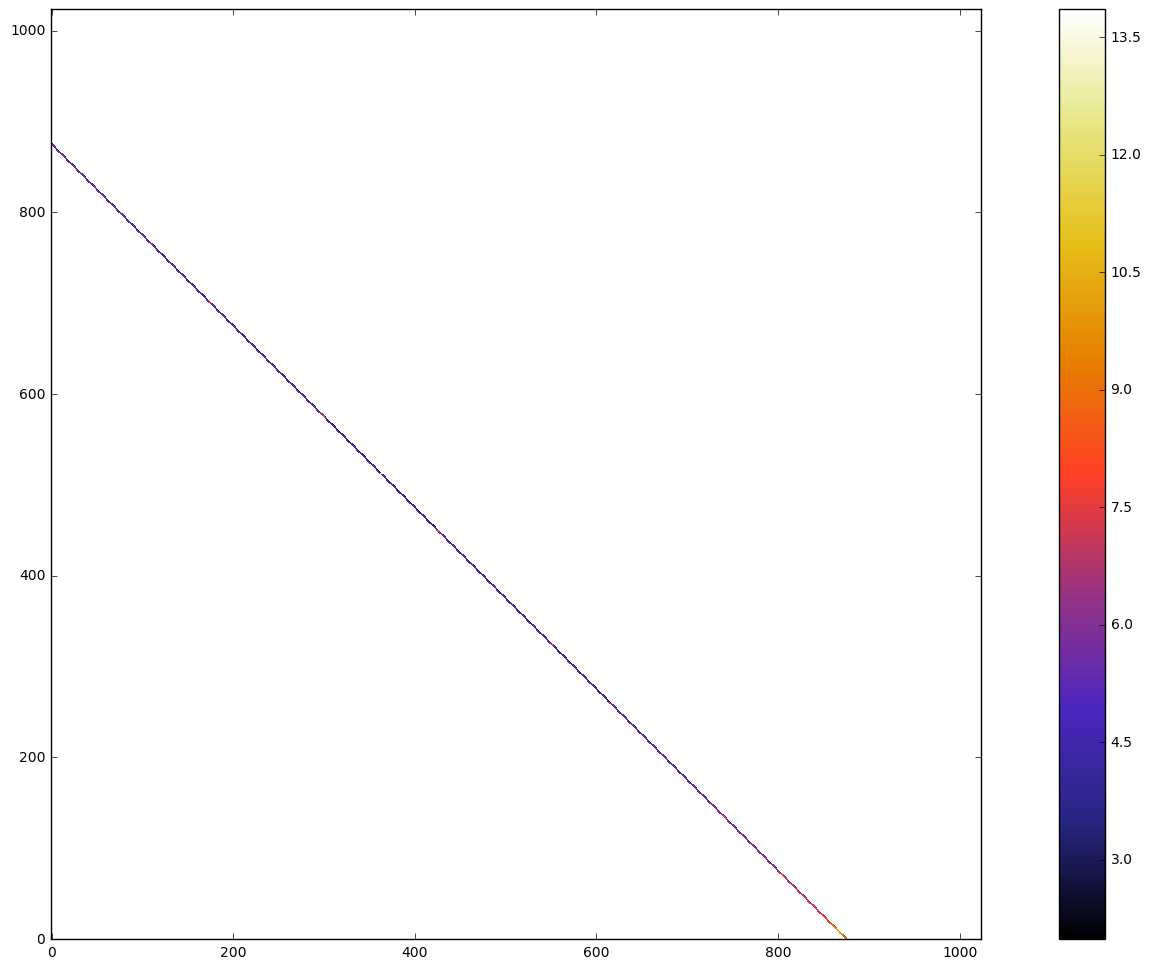

In [10]:
consts           = {\
    'domain':{'xx':xx, 'yy':yy},
    'crop_slice':(slice(512, 2048-512), slice(512, 2048-512)),
    'photon_statistics': lambda x : x}

params           = {\
    'sigma': 0.11,
    'pitch':0.23 ,
    'fsize':0.17,
    'ff_angle':np.pi/4,
    'disp':(0, -150)}

interims         = {}

Models.DistModelGrating2D()  (params, interims, consts)
aux.MeasModelFarField()          (params, interims, consts)
aux.RotateFF()                   (params, interims, consts)
aux.DisplaceMeas()               (params, interims, consts)
aux.CropFarfield()               (params, interims, consts)
aux.DrawExperimentalPhotonCount()(params, interims, consts)
aux.Farfield2Intensity()         (params, interims, consts)

dat = np.log(np.abs(interims['far_field']))
plt.figure(figsize=(20,12))
plt.imshow(dat, **aux.iss)
plt.colorbar()

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log


27.3634459322


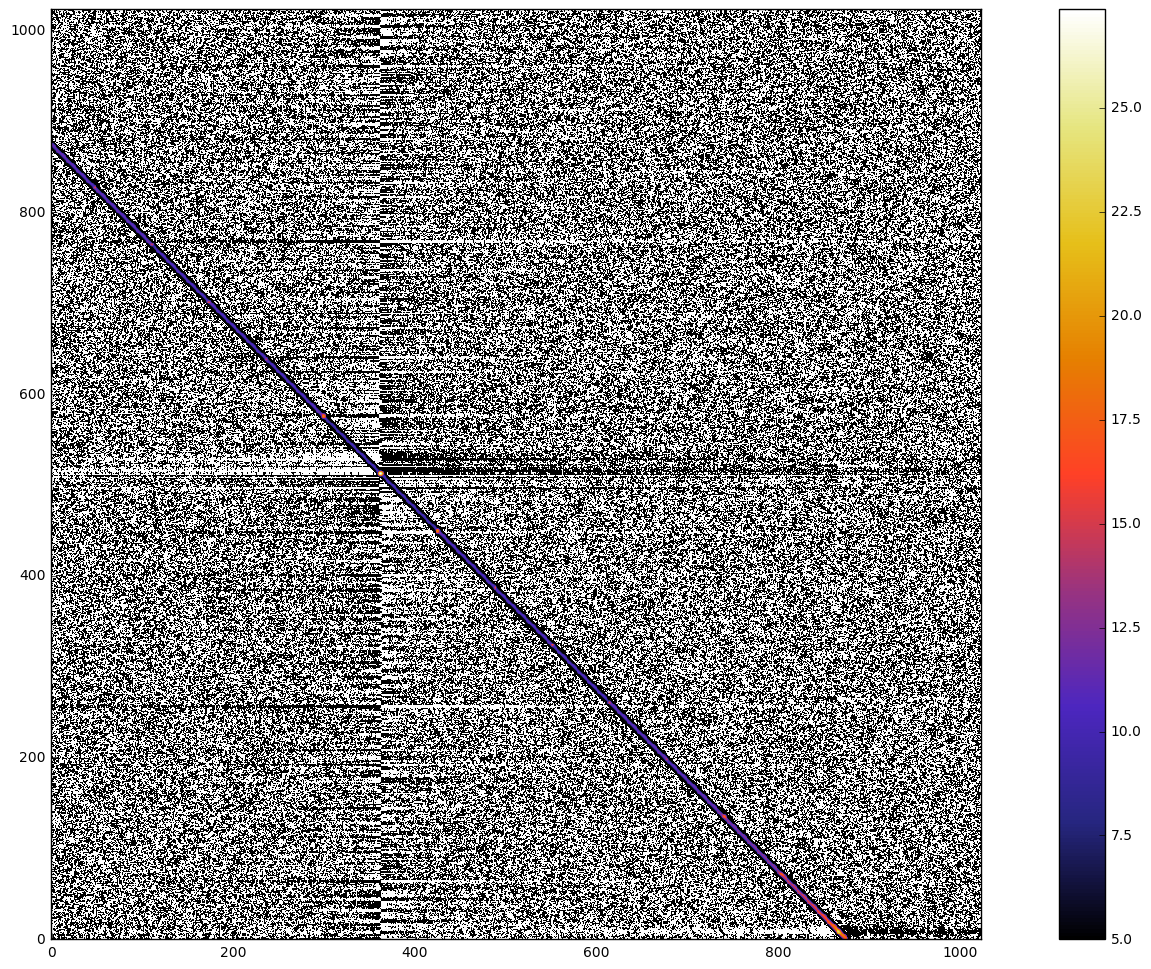

In [ ]:
consts           = {\
    'domain':{'xx':xx, 'yy':yy},
    'crop_slice':(slice(512, 2048-512), slice(512, 2048-512)),
    'photon_statistics': lambda x : x,
    'psf':model_driven_reco.create_psf(xx, yy, 0.5)}

params           = {\
    'sigma': 0.11,
    'pitch':0.23 ,
    'fsize':0.17,
    'ff_angle':np.pi/4,
    'disp':(0, -150)}

interims         = {}

Models.DistModelGrating2D()  (params, interims, consts)
aux.MeasModelFarField()          (params, interims, consts)
aux.RotateFF()                   (params, interims, consts)
aux.DisplaceMeas()               (params, interims, consts)
aux.CropFarfield()               (params, interims, consts)
aux.DrawExperimentalPhotonCount()(params, interims, consts)
aux.Farfield2Intensity()         (params, interims, consts)
Models.ConvolveIntensityWithConstantPSF()(params, interims, consts)

dat = np.log(interims['meas'])
plt.figure(figsize=(20,12))
plt.imshow(dat, **aux.iss, vmin=5)
plt.colorbar()

print(np.log(interims['meas'].max()))

In [ ]:
consts           = {\
    'domain':{'xx':xx, 'yy':yy},
    'crop_slice':(slice(512, 2048-512), slice(512, 2048-512)),
    'photon_statistics': lambda x : x,
    'psf':model_driven_reco.create_psf(xx, yy, 2.7),
    'cutoff':np.exp(15.)}

params           = {\
    'sigma': 0.001,
    'pitch': 0.017,
    'fsize': 0.008,
    'ff_angle': np.pi/4,
    'disp': (0, -150)}

interims         = {}

Models.DistModelGrating2D()  (params, interims, consts)
aux.MeasModelFarField()          (params, interims, consts)
aux.RotateFF()                   (params, interims, consts)
aux.DisplaceMeas()               (params, interims, consts)
aux.CropFarfield()               (params, interims, consts)
aux.DrawExperimentalPhotonCount()(params, interims, consts)
aux.Farfield2Intensity()         (params, interims, consts)
aux.Models.ConvolveIntensityWithConstantPSF()(params, interims, consts)
aux.CutoffIntensity()            (params, interims, consts)

dat = np.log(interims['meas'])
plt.figure(figsize=(20,12))
plt.imshow(dat, **aux.iss, vmin=5)
plt.colorbar()

print(np.log(interims['meas'].max()))
print(dat)

/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log
/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in log


15.0
[[-16.37490654 -16.38119685 -16.43407875 ...,          nan          nan
           nan]
 [-17.98660804 -18.75502568          nan ...,          nan          nan
           nan]
 [-18.0012751  -18.18595367 -18.54578952 ..., -18.42951225 -19.74240418
           nan]
 ..., 
 [-16.40256563 -16.30920744 -16.21508329 ...,          nan          nan
  -18.88676418]
 [-16.360289   -16.25344854 -16.1237901  ...,          nan          nan
           nan]
 [-16.1732729  -16.09374    -15.99980589 ...,          nan -19.17874724
  -18.83544275]]
